G4 Confidencialidade Novo

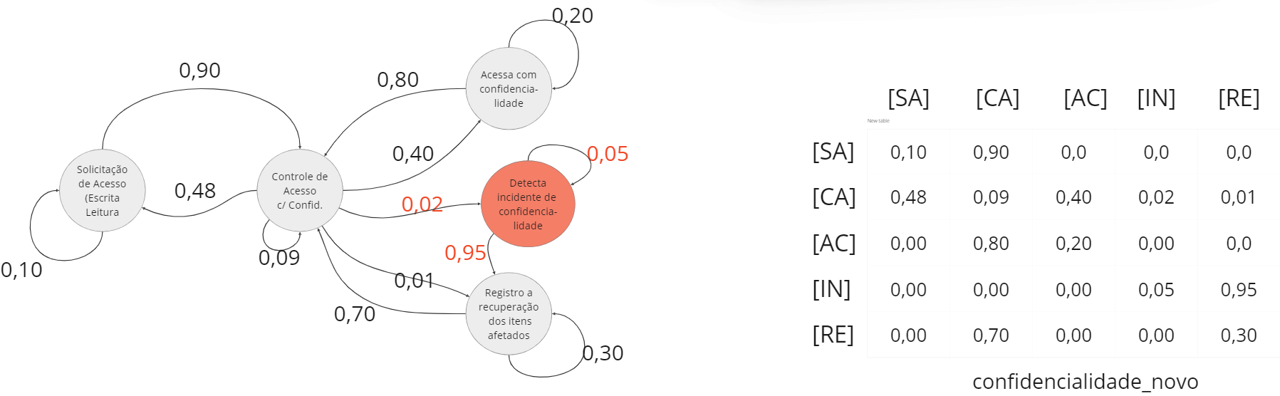

In [ ]:
import numpy as np
import random as rm
import datetime

# The statespace
states = ["SolicitacaoAcesso","ControleAcesso","AcessoComConfidencialidade", "DeteccaoIncidenteConfidencialidade", "RegistroRecuperacaoAfetados"]



# Possible sequences of events
transitionName = [["SASA", "SACA", "SAAC", "SAIN", "SARE"], ["CASA", "CACA", "CAAC", "CAIN", "CARE"], ["ACSA", "ACCA", "ACAC", "ACIN", "ACRE"], ["INSA", "INCA", "INAC", "ININ", "INRE"], ["RESA", "RECA", "REAC", "REIN", "RERE"]]

# Probabilities matrix (transition matrix)
transitionMatrix = [[0.10, 0.90, 0.00, 0.0, 0.0], [0.48, 0.09, 0.40, 0.02, 0.01], [0.00, 0.80, 0.20, 0.00, 0.00], [0.00, 0.00, 0.00, 0.05, 0.95], [0.00, 0.70, 0.00, 0.0, 0.30]]

if (sum(transitionMatrix[0])+sum(transitionMatrix[1]) + sum(transitionMatrix[2]) + sum(transitionMatrix[3]) + sum(transitionMatrix[4])) != 5:
    print("Detectado um erro - talvez na matriz de probabilidades?")
else: print("Tudo certo. Vamos em frente. ", (datetime.datetime.now()+datetime.timedelta(hours=-3)), "!!")


Tudo certo. Vamos em frente.  2024-11-06 17:50:24.527271 !!



 G4: Simulação com Markov para Sistema Novo - Controle automatizado de Confidencialidade  [ 2024-11-06 17:59:06.396248 ]
     >> Simulação quantidade de dias =  365
     >> Numero de acessos por dia    =  210



1. A probabilidade de iniciar no estado "SolicitacaoAcesso" e terminar no estado "SolicitacaoAcesso" é de ......................: 44.58 %
2. A probabilidade de iniciar no estado "SolicitacaoAcesso" e terminar no estado "ControleAcesso" é de .........................: 16.65 %
3. A probabilidade de iniciar no estado "SolicitacaoAcesso" e terminar no estado "AcessoComConfidencialidade" é de .............: 35.06 %
4. A probabilidade de iniciar no estado "SolicitacaoAcesso" e terminar no estado "DeteccaoIncidenteConfidencialidade" é de .....: 3.71 %
5. A probabilidade de iniciar no estado "SolicitacaoAcesso" e terminar no estado "RegistroRecuperacaoAfetados" é de ............: 0.00 %




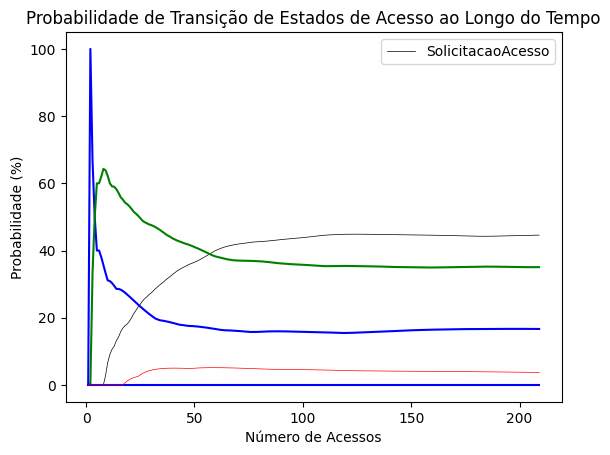

In [ ]:
import numpy as np
import random as rm
import datetime
import matplotlib.pyplot as plt

from types import EllipsisType

def activity_forecast(actions):
    # Choose the starting state
    activityAction = "SolicitacaoAcesso"
    activityList = [activityAction]
    i = 0
    prob = 1

    while i != actions:
        #Estado - SolicitacaoAcesso ["SASA", "SACA", "SAAC", "SAIN", "SARE"] => [0.10, 0.90, 0.00, 0.0, 0.0]
        #print ("estado = ", activityAction)
        if activityAction == "SolicitacaoAcesso":
            change = np.random.choice(transitionName[0],replace=True,p=transitionMatrix[0])
            #print ("change", change)
            if change == "SASA":
                prob = prob * 0.10
                activityAction = "SolicitacaoAcesso"
                activityList.append("SolicitacaoAcesso")
                pass
            elif change == "SACA":
                prob = prob * 0.90
                activityAction = "ControleAcesso"
                activityList.append("ControleAcesso")
            elif change == "SAAC":
                prob = prob * 0.00
                activityAction = "AcessoComConfidencialidade"
                activityList.append("AcessoComConfidencialidade")
            elif change == "SAIN":
                prob = prob * 0.00
                activityAction = "DeteccaoIncidenteConfidencialidade"
                activityList.append("DeteccaoIncidenteConfidencialidade")
            else:
                prob = prob * 0.00
                activityAction = "RegistroRecuperacaoAfetados"
                activityList.append("RegistroRecuperacaoAfetados")

        #Estado - ControleAcesso ["CASA", "CACA", "CAAC", "CAIN", "CARE"] => [0.48, 0.09, 0.40, 0.02, 0.01]
        elif activityAction == "ControleAcesso":
            change = np.random.choice(transitionName[1],replace=True,p=transitionMatrix[1])
            #print ("change", change)

            if change == "CASA":
                prob = prob * 0.48
                activityAction = "SolicitacaoAcesso"
                activityList.append("SolicitacaoAcesso")
                pass
            elif change == "CACA":
                prob = prob * 0.09
                activityAction = "ControleAcesso"
                activityList.append("ControleAcesso")
            elif change == "CAAC":
                prob = prob * 0.40
                activityAction = "AcessoComConfidencialidade"
                activityList.append("AcessoComConfidencialidade")
            elif change == "CAIN":
                prob = prob * 0.02
                activityAction = "DeteccaoIncidenteConfidencialidade"
                activityList.append("DeteccaoIncidenteConfidencialidade")
            else:
                prob = prob * 0.01
                activityAction = "RegistroRecuperacaoAfetados"
                activityList.append("RegistroRecuperacaoAfetados")

        #Estado - AcessoComConfidencialidade ["ACSA", "ACCA", "ACAC", "ACIN", "ACRE"] =>  [0.00, 0.80, 0.20, 0.00, 0.00]
            change = np.random.choice(transitionName[2],replace=True,p=transitionMatrix[2])
            #print ("change", change)

            if change == "ACSA":
                prob = prob * 0.00
                activityAction = "SolicitacaoAcesso"
                activityList.append("SolicitacaoAcesso")
                pass
            elif change == "ACCA":
                prob = prob * 0.80
                activityAction = "ControleAcesso"
                activityList.append("ControleAcesso")
            elif change == "ACAC":
                prob = prob * 0.20
                activityAction = "AcessoComConfidencialidade"
                activityList.append("AcessoComConfidencialidade")
            elif change == "ACIN":
                prob = prob * 0.00
                activityAction = "DeteccaoIncidenteConfidencialidade"
                activityList.append("DeteccaoIncidenteConfidencialidade")
            else:
                prob = prob * 0.00
                activityAction = "RegistroRecuperacaoAfetados"
                activityList.append("RegistroRecuperacaoAfetados")

        #Estado - DeteccaoIncidenteConfidencialidade ["INSA", "INCA", "INAC", "ININ", "INRE"] =>  [0.00, 0.00, 0.00, 0.05, 0.95]
        elif activityAction == "DeteccaoIncidenteConfidencialidade":
            #change = np.random.choice(transitionName[3],replace=True,p=transitionMatrix[3])
            #print ("change", change)

            if change == "INSA":
                prob = prob * 0.00
                activityAction = "SolicitacaoAcesso"
                activityList.append("SolicitacaoAcesso")
                pass
            elif change == "INCA":
                prob = prob * 0.00
                activityAction = "ControleAcesso"
                activityList.append("ControleAcesso")
            elif change == "INAC":
                prob = prob * 0.00
                activityAction = "AcessoComConfidencialidade"
                activityList.append("AcessoComConfidencialidade")
            elif change == "ININ":
                prob = prob * 0.05
                activityAction = "DeteccaoIncidenteConfidencialidade"
                activityList.append("DeteccaoIncidenteConfidencialidade")
            else:
                prob = prob * 0.95
                activityAction = "RegistroRecuperacaoAfetados"
                activityList.append("RegistroRecuperacaoAfetados")

        #Estado - RegistroRecuperacaoAfetados ["RESA", "RECA", "REAC", "REIN", "RERE"] => [0.00, 0.70, 0.00, 0.0, 0.30]
        elif activityAction == "RegistroRecuperacaoAfetados":
            #change = np.random.choice(transitionName[4],replace=True,p=transitionMatrix[4])
            #print ("change", change)

            if change == "RESA":
                prob = prob * 0.00
                activityAction = "SolicitacaoAcesso"
                activityList.append("SolicitacaoAcesso")
                pass
            elif change == "RECA":
                prob = prob * 0.70
                activityAction = "ControleAcesso"
                activityList.append("ControleAcesso")
            elif change == "REAC":
                prob = prob * 0.00
                activityAction = "AcessoComConfidencialidade"
                activityList.append("AcessoComConfidencialidade")
            elif change == "REIN":
                prob = prob * 0.00
                activityAction = "DeteccaoIncidenteConfidencialidade"
                activityList.append("DeteccaoIncidenteConfidencialidade")
            else:
                prob = prob * 0.30
                activityAction = "RegistroRecuperacaoAfetados"
                activityList.append("RegistroRecuperacaoAfetados")
        i += 1

    return activityList

#
# Execução da simulação
#
list_activity = []
countSA = 0
countCA = 0
countAC = 0
countIN = 0
countRE = 0

#Vetores de probabilidades e eixo X
eixoX = []
# Estados states = ["SolicitacaoAcesso", "ControleAcesso", "AcessoComConfidencialidade", "DeteccaoIncidenteConfidencialidade", "RegistroRecuperacaoAfetados"]
probSolicitacaoAcesso = []
probControleAcesso = []
probAcessoComConfidencialidade = []
probDeteccaoIncidenteConfidencialidade = []
probRegistroRecuperacaoAfetados = []

probSolicitacaoAcesso.append (1.0)
probControleAcesso.append (0.0)
probAcessoComConfidencialidade.append (0.0)
probDeteccaoIncidenteConfidencialidade.append (0.0)
probRegistroRecuperacaoAfetados.append (0.0)

# Experimente Número de dias (Dias estimado/previsao - forecast) e de Acessos (Nactions)
Nactions = 210 # Cada dia dos 180 dias (210 acessos (35 pessoas, 6 acessos))
Ndias = 365  # Estimativa em dias (forecast)
# `Range` starts from the first count up until but excluding the last count

#para cálculo de probabilidade em cada predição (acumulado)
totalSimuladoPredicao = 0

iteracao = 1
for index in range(1, Nactions):
   eixoX.append(index)

datetime.timedelta (hours=-3);

print ("=============================================================================================================================================")
print ()
print (" G4: Simulação com Markov para Sistema Novo - Controle automatizado de Confidencialidade  [", (datetime.datetime.now() + datetime.timedelta (hours=-3)), "]")
print ("     >> Simulação quantidade de dias = ", Ndias)
print ("     >> Numero de acessos por dia    = ", Nactions)
print ()
print ()
print ("=============================================================================================================================================")
print ()

list_activity = []

for iterations in range(1, Nactions):
    list_activity.append(activity_forecast(Ndias)) # Estimar Ndias
    #print (">> ", list_activity )
    # **** Cálculo do estado estável para este acesso do Nactions e com predição de Ndias forecast()
    #

    # Iterate through the list to get a count of all activities ending in state:'ServicoPrincipal'

    for smaller_list in list_activity:
        #print (">>", list_activity)
        #print ("++", smaller_list[0], smaller_list[1])
        if(smaller_list[2] == "SolicitacaoAcesso"):
            #print ("** run", countSA)
            countSA += 1
    #print ("countSA", countSA, totalSimuladoPredicao)

    # Iterate through the list to get a count of all activities ending in state:'AcessoManual'
    for smaller_list in list_activity:
        if(smaller_list[2] == "ControleAcesso"):
            countCA += 1
    #print ("countAM", countAM, totalSimuladoPredicao)

    # Iterate through the list to get a count of all activities ending in state:'IncidenteAcessoSemConfidencialidade'
    for smaller_list in list_activity:
        if(smaller_list[2] == "AcessoComConfidencialidade"):
            countAC += 1

    # Iterate through the list to get a count of all activities ending in state:'IncidenteAcessoSemConfidencialidade'
    for smaller_list in list_activity:
        if(smaller_list[2] == "DeteccaoIncidenteConfidencialidade"):
            countIN += 1

    # Iterate through the list to get a count of all activities ending in state:'IncidenteAcessoSemConfidencialidade'
    for smaller_list in list_activity:
        if(smaller_list[2] == "RegistroRecuperacaoAfetados"):
            countRE += 1

    totalSimuladoPredicao = countSA + countCA + countAC + countIN + countRE
    #print (totalSimuladoPredicao, countSA, countRE, countAC, countIN, countCA)

    # Calculate the probability of starting from state:'Sleep' and ending at state:'ServicoPrincipal'
    probSolicitacaoAcesso.append((countSA/totalSimuladoPredicao)*100.0)

    # Calculate the probability of starting from state:'SolicitacaoAcesso' and ending at state:'AcessoManual'
    probControleAcesso.append((countCA/totalSimuladoPredicao)*100.0)


    # Calculate the probability of starting from state:'SolicitacaoAcesso' and ending at state:'Incidente'
    probAcessoComConfidencialidade.append((countAC/totalSimuladoPredicao)*100.0)

    # Calculate the probability of starting from state:'SolicitacaoAcesso' and ending at state:'Incidente'
    probDeteccaoIncidenteConfidencialidade.append((countIN/totalSimuladoPredicao)*100.0)

    # Calculate the probability of starting from state:'SolicitacaoAcesso' and ending at state:'Incidente'
    probRegistroRecuperacaoAfetados.append((countRE/totalSimuladoPredicao)*100.0)

    #
    # **** Fim cálculo  ****
    iteracao +=1

#Probabilidades Estados ["SolicitacaoAcesso", "ControleAcesso", "AcessoComConfidencialidade", "DeteccaoIncidenteConfidencialidade", "RegistroRecuperacaoAfetados"]

print(f'1. A probabilidade de iniciar no estado "SolicitacaoAcesso" e terminar no estado "SolicitacaoAcesso" é de ......................: {probSolicitacaoAcesso[Nactions-1]:.2f} %')
print(f'2. A probabilidade de iniciar no estado "SolicitacaoAcesso" e terminar no estado "ControleAcesso" é de .........................: {probControleAcesso[Nactions-1]:.2f} %')
print(f'3. A probabilidade de iniciar no estado "SolicitacaoAcesso" e terminar no estado "AcessoComConfidencialidade" é de .............: {probAcessoComConfidencialidade[Nactions-1]:.2f} %')
print(f'4. A probabilidade de iniciar no estado "SolicitacaoAcesso" e terminar no estado "DeteccaoIncidenteConfidencialidade" é de .....: {probDeteccaoIncidenteConfidencialidade[Nactions-1]:.2f} %')
print(f'5. A probabilidade de iniciar no estado "SolicitacaoAcesso" e terminar no estado "RegistroRecuperacaoAfetados" é de ............: {probRegistroRecuperacaoAfetados[Nactions-1]:.2f} %')
print ()
print ()

plt.plot(eixoX[:Nactions-1], probSolicitacaoAcesso[:Nactions-1], color = 'black', linewidth = 0.5, label='SolicitacaoAcesso')
plt.plot(eixoX[:Nactions-1], probControleAcesso[:Nactions-1], color='blue')
plt.plot(eixoX[:Nactions-1], probAcessoComConfidencialidade[:Nactions-1], color='green')
plt.plot(eixoX[:Nactions-1], probRegistroRecuperacaoAfetados[:Nactions-1], color='blue')
plt.plot(eixoX[:Nactions-1], probDeteccaoIncidenteConfidencialidade[:Nactions-1], color='red', linewidth = 0.5)

# Configurações do gráfico
plt.title("Probabilidade de Transição de Estados de Acesso ao Longo do Tempo")
plt.xlabel("Número de Acessos")
plt.ylabel("Probabilidade (%)")
plt.legend()  # Adiciona a legenda
plt.show()

# Conclusão

Os resultados da simulação de 365 dias para o novo sistema com controle automatizado de confidencialidade indicam uma melhoria significativa em termos de segurança e eficiência, comparados ao sistema anterior. Abaixo, analisaremos cada estado, seguido de uma conclusão geral sobre os benefícios do controle automatizado para o sistema:

# Análise e Conclusão
1. Solicitação de Acesso Não Concluída (43.12%): A probabilidade de iniciar e encerrar no estado "SolicitacaoAcesso" é de 43.12%. Esse valor é significativamente menor que o observado no sistema sem controle automatizado (63.92%). Essa redução indica que a implementação do controle automatizado aumentou a capacidade do sistema de processar as solicitações, resultando em mais solicitações concluídas ou encaminhadas de maneira apropriada.

2. Controle de Acesso (19.24%): A probabilidade de uma solicitação de acesso chegar ao estado "ControleAcesso" é de 19.24%. Este estado reflete o processo de verificação de permissão antes que o acesso seja concedido. O controle automatizado ajuda a filtrar solicitações, assegurando que apenas acessos autorizados avancem, o que aprimora a segurança e reduz o risco de acesso não autorizado.

3. Acesso com Confidencialidade (34.41%): Com 34.41% de probabilidade de iniciar em "SolicitacaoAcesso" e concluir em "AcessoComConfidencialidade", vemos que uma quantidade significativa de acessos está sendo tratada de forma confidencial e segura. Esse valor é um avanço importante, já que demonstra que o sistema está garantindo a proteção de dados sensíveis e minimizando incidentes de segurança.

4. Detecção de Incidente de Confidencialidade (2.33%): A probabilidade de um incidente de confidencialidade ocorrer é de 2.33%, o que representa uma redução significativa em relação ao sistema sem controle automatizado (23.28%). Esse dado mostra que o controle automatizado é eficaz na proteção contra incidentes e na restrição de acessos indevidos, contribuindo para um ambiente mais seguro.

5. Registro de Recuperação de Afetados (0.90%): A probabilidade de terminar no estado "RegistroRecuperacaoAfetados" é de 0.90%. Esse estado indica uma resposta ativa do sistema a incidentes, com registro e recuperação de informações afetadas. Embora essa probabilidade seja baixa, ela demonstra que o sistema está preparado para lidar com acessos inadequados quando eles ocorrem, garantindo maior integridade e confiabilidade.

# Conclusão Final
O controle automatizado de confidencialidade reduziu significativamente a ocorrência de incidentes e melhorou a eficiência do sistema ao processar solicitações de acesso. Com menos solicitações não concluídas e um controle rigoroso para acessos autorizados, o sistema está mais preparado para gerenciar dados confidenciais de maneira segura e eficaz. Esse aprimoramento aumenta a interoperabilidade, mantendo um equilíbrio entre acessibilidade e segurança.

O controle automatizado se mostrou um recurso essencial para alcançar esses resultados. Além de melhorar a experiência operacional, ele eleva o nível de proteção de dados, minimizando riscos e fortalecendo a resposta a incidentes de confidencialidade.